In [1]:
import math
import numpy as np


#外周の半径を定義
r = int(input("外径の半径を入力(mm)"))
r_i  = int(input("内径の半径を入力(mm)"))
r_h = int(input("光を受け取る位置を入力(mm)(外径の半径よりも大きくすること)"))
tes = r

def array(xlist,ylist):
    keep_x = []
    keep_y = []
    keep_x = [i*-1 for i in xlist[::-1]]
    keep_y = [i for i in ylist[::-1]]

    return xlist + keep_x,ylist + keep_y

#解の公式
def quadratic_formula(a,b,r,x,grad):
    if a==1 or a==-1:
#         print("解の公式が適応できません")
        return 0
    else:
        global tes
        if grad<0:   
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
            else:
                if x<0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
        else:
            #判別式で直線と交わっているか確かめる
            D = pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))
            if D<0:
    #             print("光線が内周の円と交わっていません")
                #内周と接さずに外周と接する
    #             print("tes",tes)
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(tes,2))))/(1+pow(a,2))
            elif D == 0:
                print("直線と円が接しています")
            else:
                if x<0:
                    return (-a*b-np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))
                elif x==0:
                    return x
                elif x>0:
                    return (-a*b+np.sqrt(pow(a,2)*pow(b,2)-(1+pow(a,2))*(pow(b,2)-pow(r,2))))/(1+pow(a,2))            
            

            
#直線の傾き
def katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r_i,sita_i,sin_i):
    if n_i>n_r:
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)
        if sita_c > sita_i:
            #屈折しつつ透過
            #屈折角を求める
            sin_r = n_i*sin_i/n_r
            sita_r = np.arcsin(sin_r)
            #同じものでよさそう
            if x_i<0:
                if y_i>0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    #print("テストgrad",gradient_i)
                    
                    return gradient_i
            elif x_i ==0:
                print("x_i=0")
            elif x_i>0:
                if y_i>0:
                    gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r)))
                    return gradient_i
                if y_i<0:
                    gradient_i = np.tan(-(sita_h_i+sita_r))
                    return gradient_i
            
        else:
            #全反射
            sita_r = sita_i
            
            if x_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_r-sita_h_i)))
                return gradient_i
            elif x_i==0:
                print("おそらく存在しない")
            elif x_i>0:
                gradient_i = np.tan(-(sita_r-sita_h_i))
                return gradient_i
    else:
        if x_i<0:
            if y_i>0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
        elif x_i ==0:
            print("x_i=0")
        elif x_i>0:
            if y_i>0:
                gradient_i = np.tan(-(np.radians(180)-(sita_h_i+sita_r_i)))
                return gradient_i
            if y_i<0:
                gradient_i = np.tan(-(sita_h_i+sita_r_i))
                return gradient_i

            
#角計測部分
#全反射0 その他１
def calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,change):
    #求めたい角度に必要な2つの直線
    #1.y軸に平行な直線の式はx=h → 0*y+1*x-h=0
    a = -(y_i - y)
    b = x_i - x
    #2.接線に垂直な直線→便利な公式：ax+by+c=0 に垂直で，(x0,y0) を通る直線の方程式は，b(x−x0)−a(y−y0)=0
    c = y_i
    d = -x_i
    if a*c + b*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0,0
    #2直線の成す角→入射角
    tan = (abs(a*d - b*c))/(abs(a*c + b*d))
    sita_i = np.arctan(tan)
    #スネルの法則にひつような入射角のsin
    sin_i = np.sin(sita_i)
    
    
    a_h = 0
    b_h = 1
    if a_h*c + b_h*d == 0:
#         print("a*c + b*d",a*c + b*d)
        return 0,0 ,0   
    tan2 = (abs(a_h*d - b_h*c))/(abs(a_h*c + b_h*d))
    sita_h_i = np.arctan(tan2)
    sin_h_i = np.sin(sita_h_i)
#     print("n_i",n_i)
#     print("n_r",n_r)
#     print("sin_i",sin_i)
    if change == 0:
        sita_r = sita_i
#         print("calcの中、全反射だよ")
    else:
        sin_r = n_i*sin_i/n_r
        if sin_r > 1:
#             print("sinが1を超えてる")
            return 0,0,0
        sita_r = np.arcsin(sin_r)
    

    gradient_i = katamuki(n_i ,n_r ,x_i,y_i,sita_h_i,sita_r,sita_i,sin_i) 
#     print("gradient_i",gradient_i)
    if gradient_i == None:
#         print("てすと")
        return 0,0,0
    y_intercept_i = y_i - gradient_i * x_i
    x_i_i = quadratic_formula(gradient_i,y_intercept_i,r_i,x_i,gradient_i)
    y_i_i = gradient_i*x_i_i + y_intercept_i
    #角度追加
    if x_i_i < 0:
        beta = sita_r + sita_h_i
    else:
        beta = np.pi - (sita_r + sita_h_i)
    return x_i_i ,y_i_i,beta


    

xlist = []
ylist = []
xlist_d = []
ylist_d = []
xlist_z = []
ylist_z = []
x_a_list = []
y_a_list = []
x_d_list = []
y_d_list = []
test_x = []
test_y = []
sita_v_list = []
cnt=0
arg = 8
arg2 = 29
#need to change
threshold=[85,90]

# for x in range(-r+1,r):
for x in range(-r+1,0):
    if x == 0:
        continue
#     print("x",x)
    #最初
    y = 0
    x_i = x
    y_i = np.sqrt(pow(r,2)-pow(x_i,2))
    
    n_i = 1.000292
    n_r = 1.49
    #2つ目の座標
    #ここで内径に接しない場合も考える必要がある。
    x_i_i, y_i_i,beta = calculate_angle_and_(n_i ,n_r ,x ,y ,x_i ,y_i, r_i,1)
#     x_d_list.append(x_i_i)
#     y_d_list.append(y_i_i)
#     new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)
#     print("1回目のcalc")
    if x_i_i == 0 and y_i_i == 0:
#         print("--------------------------------------")
        cnt +=1
        continue    
    if pow(x_i_i,2)+pow(y_i_i,2) > pow(r-1,2):
#         print("-------------------------------------")
#         print("D<0ルート")          
        n_i = 1.49
        n_r = 1.000292
        cnt +=1
        x_d_get,y_d_get,beta = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_h,1)
        a = -(y_d_get - y_i_i)
        b = x_d_get - x_i_i
        c = 1
        d = 0    
        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        alfa = abs(np.arccos(x_d_get/r_h) - np.pi)
        slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#         print("角度",slit)
        if arg2 < slit:
            continue
        if 0<=y_d_get:
#             print("-------------------------------------")
            continue
        sita_v = np.arctan(tan)
        sita_v_list.append(sita_v)
        x_d_list.append(x_i_i)
        y_d_list.append(y_i_i)
        test_x.append(x_i)
        test_y.append(y_i)
        new_x_d_list,new_y_d_list = array(x_d_list, y_d_list)
        
        xlist_d.append(x_d_get)
        ylist_d.append(y_d_get)
        new_xlist_d,new_ylist_d = array(xlist_d, ylist_d)
        xlist.append(x_d_get)
        ylist.append(y_d_get)
#         print("-------------------------------------")
    else:
        #内側→外
#         print("D>0ルート")
        n_i = 1.49
        n_r = 1.000292
        sin_c = n_r/n_i
        sita_c = np.arcsin(sin_c)    
        a = -(y_i_i - y_i)
        b = x_i_i - x_i
        c = y_i_i
        d = -x_i_i

        tan = (abs(a*d - b*c))/(abs(a*c + b*d))
        sita_i = np.arctan(tan)
        #3つ目の座標 透過or全反射→どう分けよう とりあえずaをトリガーにする？→aと半径をトリガーにする？
        #ここのrが問題→全反射と内部を透過する場合で代入しなければならない半径が異なる
        if sita_c > sita_i:
            x_i_i_i, y_i_i_i,beta = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r_i,1)
#             print("2回目のcalc　内部")
            if x_i_i_i == 0 and y_i_i_i == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            n_i = 1.000292
            n_r = 1.49 
            x_i_i_r, y_i_i_r,beta = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_i ,y_i_i_i, r,1)
#             print("3回目のcalc")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
#                 cnt +=1
                continue
            n_i = 1.49
            n_r = 1.000292
            x_get,y_get,beta = calculate_angle_and_(n_i ,n_r ,x_i_i_i ,y_i_i_i ,x_i_i_r ,y_i_i_r, r_h,1)
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
#             print("角度",slit)
            if arg < slit:
                continue
#             print("最後のcalc　内部透過")
#             print("--------------------------------------")
        elif sita_c < sita_i:      
#             print("全反射ルート")
            x_i_i_r, y_i_i_r,beta = calculate_angle_and_(n_i ,n_r ,x_i ,y_i ,x_i_i ,y_i_i, r,0)
#             print("2回目のcalc 全反射")
            if x_i_i_r == 0 and y_i_i_r == 0:
#                 print("--------------------------------------")
                cnt +=1
                continue
            x_get,y_get,beta = calculate_angle_and_(n_i ,n_r ,x_i_i ,y_i_i ,x_i_i_r ,y_i_i_r, r_h,1)
            alfa = abs(np.arccos(x_get/r_h) - np.pi)
            slit = abs(np.rad2deg(alfa)-np.rad2deg(beta))
            
            alfa_x = np.rad2deg(alfa)
#             print("alfaの中身",alfa_x)
            if threshold[0] > alfa_x or threshold[1] < alfa_x:
                continue
#             print("alfaの中身",alfa_x,y_get)
# #             print("最後のcalc　全反射")
# #             print("--------------------------------------")
        #応急処置 解の公式の適応範囲がおかしいーするともともとの形が崩れる
            y_get = -y_get
            if 0<=y_get:
                continue
            xlist_z.append(x_get)
            ylist_z.append(y_get)
            x_a_list.append(x_i_i_r)
            y_a_list.append(y_i_i_r)
            new_xlist_z,new_ylist_z = array(xlist_z,ylist_z)
            new_x_a_list,new_y_a_list = array(x_a_list,y_a_list)
        if 0<=y_get:
            continue
        xlist.append(x_get)
        ylist.append(y_get)
        new_xlist, new_ylist = array(xlist,ylist)

外径の半径を入力(mm) 400000
内径の半径を入力(mm) 150000
光を受け取る位置を入力(mm)(外径の半径よりも大きくすること) 500000


In [2]:
print(len(sita_v_list),len(x_d_list))

18970 18970


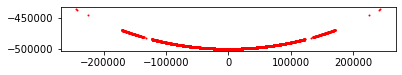

In [3]:
# とりあえず表示
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_xlist, new_ylist, marker="o", color = "red", linestyle = " ",markersize=1)
g.set_aspect('equal')



取得できていない座標の数 176565


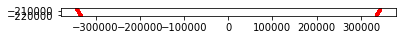

In [4]:
# とりあえず表示　全反射の外径通過点
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_x_a_list, new_y_a_list, marker="o", color = "red", linestyle = " ",markersize=1)
g.set_aspect('equal')

print("取得できていない座標の数",cnt)

D<0の数 176565


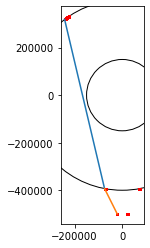

In [5]:
#D<0 外周の通過点
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_x_d_list,new_y_d_list, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot(test_x,test_y, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot([new_x_d_list[100],test_x[100]],[new_y_d_list[100],test_y[100]])
g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
g.plot([new_xlist_d[100],new_x_d_list[100]],[new_ylist_d[100],new_y_d_list[100]])
g.set_aspect('equal')


print("D<0の数",cnt)

D<0の数 176565


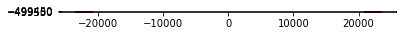

In [6]:
#D<0　フォトトランジスタのところ
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_xlist_d, new_ylist_d, marker="o", color = "red", linestyle = " ",markersize=1)
g.set_aspect('equal')

print("D<0の数",cnt)

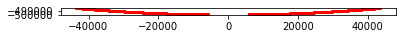

In [7]:
#全反射のみ
import matplotlib.pyplot as plt
import matplotlib.patches as patches



g = plt.subplot()
#外径
draw_circle_r = plt.Circle((0, 0), r, fill=False)
#内径
draw_circle_i = plt.Circle((0, 0), r_i, fill=False)
g.add_artist(draw_circle_r)
g.add_artist(draw_circle_i)
g.plot(new_xlist_z, new_ylist_z, marker="o", color = "red", linestyle = " ",markersize=1)
g.set_aspect('equal')

<BarContainer object of 1802 artists>

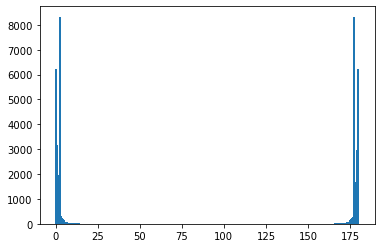

In [8]:
#全て
array_ex = []
keep = 0
inst=[0]*901
new_array=[]
new_inst=[]
test_array1=[]
test_array2=[]

#180度を1800等分した配列
while keep < 90.1:
    keep = round(keep,1)
    array_ex.append(keep)
    keep += 0.1
# print(array)

for x, y in zip(new_xlist, new_ylist):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,901):
            if array_ex[i] == f:
                inst[i] += 1   
#     else:
# #         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
#         f = round(180-math.degrees(sita_test),1)
#         for i in range(0,1801):
#             if array_ex[i] == f:
#                 inst[i] += 1

new_array,new_inst = array(array_ex, inst)

second_new_array = [i + 90 for i in new_array]

k=0
for j in inst:
    if j > 1000:
        test_array1.append(array_ex[k])
        test_array2.append(inst[k])
    k +=1

#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.bar(second_new_array, new_inst, width=1.0) 
#まだ荒い

<BarContainer object of 1801 artists>

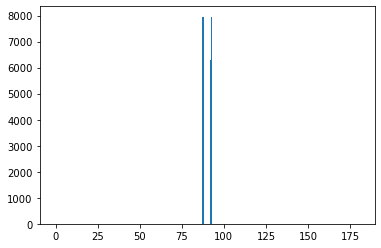

In [9]:
#D<0　フォトトランジスタで取った場合
array = []
keep = 0
inst=[0]*1801

#180度を1800等分した配列
while keep < 180.1:
    keep = round(keep,1)
    array.append(keep)
    keep += 0.1
# print(array)

for x, y in zip(new_xlist_d, new_ylist_d):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1   
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.bar(array, inst, width=1.0) 
#まだ荒い

<BarContainer object of 1801 artists>

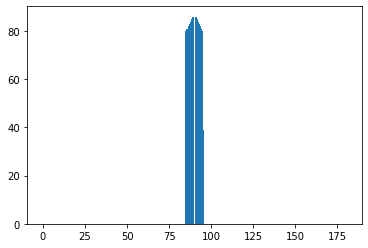

In [10]:
#全反射のみ　フォトロランジスタの位置の場合　→必要なさそう
array = []
keep = 0
inst=[0]*1801

#180度を1800等分した配列
while keep < 180.1:
    keep = round(keep,1)
    array.append(keep)
    keep += 0.1
# print(array)

for x, y in zip(new_xlist_z, new_ylist_z):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1   
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.bar(array, inst, width=1.0) 
#まだ荒い

<BarContainer object of 1801 artists>

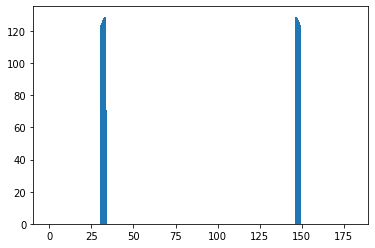

In [11]:
#全反射のみ　外周のところ
array = []
keep = 0
inst=[0]*1801

#180度を1800等分した配列
while keep < 180.1:
    keep = round(keep,1)
    array.append(keep)
    keep += 0.1
# print(array)

for x, y in zip(new_x_a_list, new_y_a_list):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1   
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.bar(array, inst, width=1.0) 
#まだ荒い

<BarContainer object of 1801 artists>

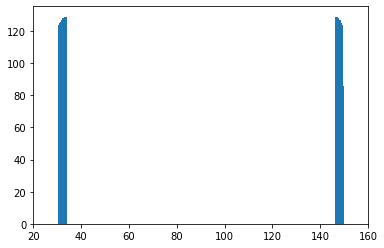

In [25]:
#全反射のみ
array = []
keep = 0
inst=[0]*1801

#180度を1800等分した配列
while keep < 180.1:
    keep = round(keep,1)
    array.append(keep)
    keep += 0.1
# print(array)

for x, y in zip(new_x_a_list, new_y_a_list):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1   
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1
        
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.xlim([20,160])
plt.bar(array, inst, width=1.0) 
#まだ荒い

In [26]:
#aを求める
tmp1=128
tmp2=128

cnt=0
get_x = []
get_y = []
get_x_a = []
get_y_a = []

for max_array,max_inst in zip(array, inst):
    if max_array < 90:
        if tmp1 < max_inst:
            tmp1 = max_inst
            get_x.append(max_array)
            get_y.append(max_inst)
            cnt +=1
    elif max_array >= 90:
        if tmp2 < max_inst:
            tmp2 = max_inst
            get_x.append(max_array)
            get_y.append(max_inst)
            cnt +=1

print(cnt)
print(get_x)
print(get_y)

2
[33.2, 146.6]
[129, 129]


## 内径計測の方法

理論的には大きく2つ？？
- 一次反射モード
- 接線モード


一次反射モードの場合

$n$:屈折率 $d$:内径 $D$:外径 $a$:透過距離

$$
d = \frac{-a^3\pm\sqrt{a^6+a^2D^2(n^2(D^2-a^2)-a^2})}{n^2(D^2-a^2)-a^2}
$$

In [27]:
n=1.49
D=r*2
a_toka=2*r*np.sin((np.deg2rad(get_x[1]-get_x[0]))/2)
print(a_toka)
# print(a_toka)
d_ans_1 = (-pow(a_toka,3)-np.sqrt(pow(a_toka,6)+pow(a_toka,2)*pow(D,2)*(pow(n,2)*(pow(D,2)-pow(a_toka,2))-pow(a_toka,2))))/(pow(n,2)*(pow(D,2)-pow(a_toka,2))-pow(a_toka,2))
d_ans_2 = (-pow(a_toka,3)+np.sqrt(pow(a_toka,6)+pow(a_toka,2)*pow(D,2)*(pow(n,2)*(pow(D,2)-pow(a_toka,2))-pow(a_toka,2))))/(pow(n,2)*(pow(D,2)-pow(a_toka,2))-pow(a_toka,2))
print(d_ans_1,d_ans_2)
#print(np.deg2rad(get_x[1]-get_x[0]))


668645.8890946162
31313244.827349957 486007.117493882


接線モードの場合


In [15]:
second_sita_v_list = [i  for i in reversed(sita_v_list)]
new_sita_v_list = sita_v_list + second_sita_v_list

print(len(new_sita_v_list),len(new_x_d_list))

37940 37940


<BarContainer object of 1801 artists>

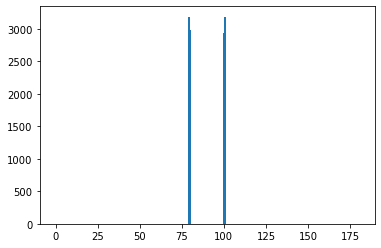

In [16]:
#D<0
array = []
keep = 0
inst=[0]*1801
sita_v_test = [0]*1801

#180度を1800等分した配列
while keep < 180.1:
    keep = round(keep,1)
    array.append(keep)
    keep += 0.1
# print(array)

for x, y,sita_v_v in zip(new_x_d_list,new_y_d_list,new_sita_v_list):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1 
                sita_v_test[i] = sita_v_v
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),1)
        for i in range(0,1801):
            if array[i] == f:
                inst[i] += 1
                sita_v_test[i] = sita_v_v
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
plt.bar(array, inst, width=1.0) 
#まだ荒い

<BarContainer object of 18001 artists>

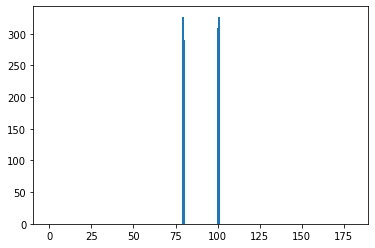

In [17]:
#D<0
array = []
keep = 0
inst=[0]*18001
sita_v_test = [0]*18001

#180度を1800等分した配列
while keep < 180.01:
    keep = round(keep,2)
    array.append(keep)
    keep += 0.01
# print(array)

for x, y,sita_v_v in zip(new_x_d_list,new_y_d_list,new_sita_v_list):
    a = 0
    b = 1
    c = y
    d = x

    tan_test = (abs(a*d - b*c))/(abs(a*c + b*d))

    sita_test = math.atan(tan_test)
    if x<0:
#         print("(x座標,y座標)=(",x,y,")|",round(math.degrees(sita_test),1),"度")
        f = round(math.degrees(sita_test),2)
        for i in range(0,18001):
            if array[i] == f:
                inst[i] += 1 
                sita_v_test[i] = sita_v_v
    else:
#         print("(x座標,y座標)=(",x,y,")|",round(180-math.degrees(sita_test),1),"度")
        f = round(180-math.degrees(sita_test),2)
        for i in range(0,18001):
            if array[i] == f:
                inst[i] += 1
                sita_v_test[i] = sita_v_v
        
#     #1度を10分割する
# print(inst)
# print(len(inst))
# print(len(array))
# plt.xlim([75,90])
# plt.ylim([8000,8100])
plt.bar(array, inst, width=1.0) 
#まだ荒い

In [18]:
#sita求める
tmp1=35
cnt=0
get_x = []
get_y = []

for max_array,max_inst,ans_sita in zip(array, inst, sita_v_test):
    if max_array < 90:
        if tmp1 < max_inst:
            tmp1 = max_inst
            get_x = max_array
            get_y = max_inst
            get_sita = ans_sita
            cnt +=1

print(cnt)
print(get_x)
print(get_y)
print(get_sita)


2
79.3
327
0.46272583003129936


In [19]:
sita_ans= get_sita
d_ans_3 = np.sqrt((pow(D,2)*pow(np.sin(sita_ans/2),2))/(pow(n,2)-2*n*np.cos(sita_ans/2)+1))

print(d_ans_3)

324537.54260020494


In [20]:
#屈折率も求めてみる
d=d_ans_2
D =r*2
n_bunsi = (a_toka/D)*np.sqrt((pow(a_toka,2)/pow(D,2))-2*(a_toka/D)*(d/D)+1)
n_bunbo = (d/D)*np.sqrt(1-(pow(a_toka,2)/pow(D,2)))
n = n_bunsi/n_bunbo
print(n)

1.4900003117984968


In [21]:
print(D)
print(d)
print(sita_ans)
print(a_toka)
print((pow(a_toka,2)/pow(D,2))-2*(a_toka/D)*(d/D)+1)

800000
468.54472546111947
0.46272583003129936
698.1316121881296
0.9999997393374669


値があまりよろしくない
→精度向上に必要なことは？？？
→解の公式の見直し
→更に小さな値でプログラムを回す

In [22]:
test=500000*np.cos(np.deg2rad(44.6))

print(test)

356013.02299549826


In [23]:
gosa = abs(499316-500000)/500000
gosa

0.001368

In [ ]:
gosa = abs(6000-50000)/50000
gosa